In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("car data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data=data.drop("Car_Name",axis=1)

In [8]:
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [10]:
data['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

In [11]:
data['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb=LabelEncoder()

In [14]:
data['Transmission']=lb.fit_transform(data['Transmission'])
data['Fuel_Type']=lb.fit_transform(data['Fuel_Type'])
data['Selling_type']=lb.fit_transform(data['Selling_type'])

In [15]:
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [16]:
data.shape

(301, 8)

# EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sb

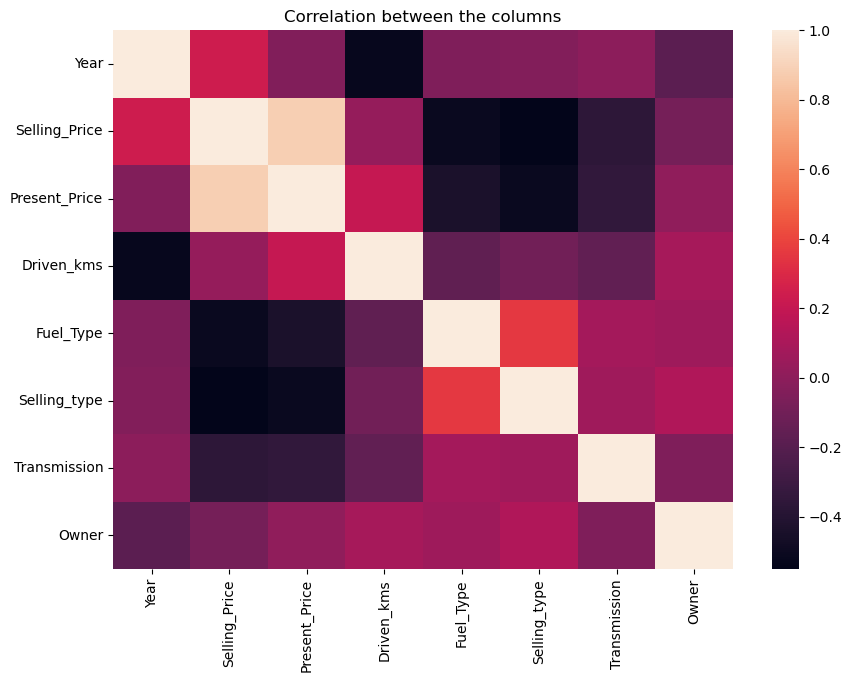

In [18]:
plt.figure(figsize=(10,7))
sb.heatmap(data.corr())
plt.title('Correlation between the columns')
plt.show()

<BarContainer object of 301 artists>

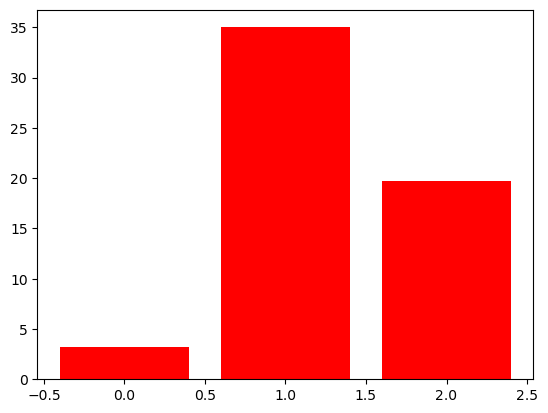

In [19]:
plt.bar(data['Fuel_Type'],data['Selling_Price'],color='red')

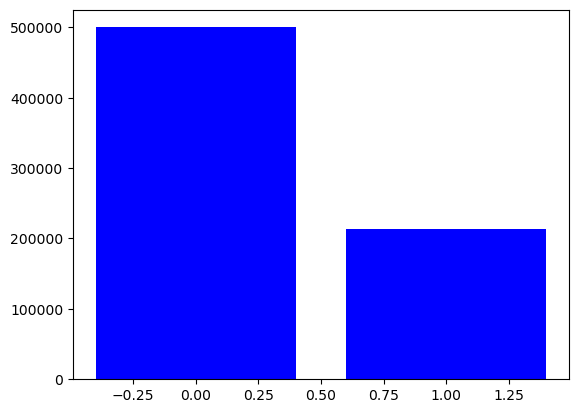

In [20]:
plt.bar(data['Transmission'],data['Driven_kms'],color='blue')
plt.show()

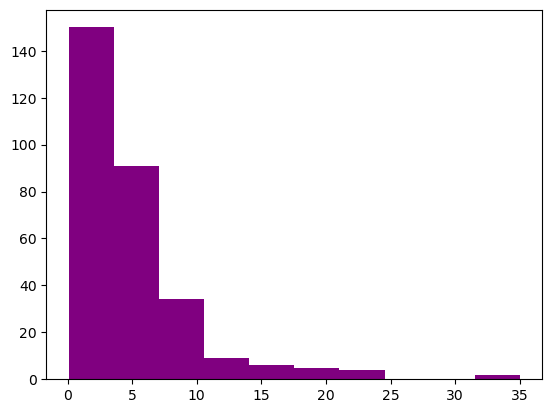

In [21]:
plt.hist(data['Selling_Price'],color="purple")
plt.show()

In [22]:
x=data.drop("Selling_Price",axis=1)
y=data['Selling_Price']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [25]:
x_train.shape

(225, 7)

In [26]:
y_test.shape

(76,)

In [27]:
from sklearn.linear_model  import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [29]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [30]:
p1=lin.predict(x_test)
print("MAE:",mean_absolute_error(p1,y_test))
print("R2 Score:",r2_score(p1,y_test))
print("MSE:",mean_squared_error(p1,y_test))

MAE: 1.2736096677747688
R2 Score: 0.8652622048161869
MSE: 6.436584837875694


In [31]:
de=DecisionTreeRegressor()
de.fit(x_train,y_train)

DecisionTreeRegressor()

In [32]:
p2=de.predict(x_test)
print("MAE:",mean_absolute_error(p2,y_test))
print("R2 Score:",r2_score(p2,y_test))
print("MSE:",mean_squared_error(p2,y_test))

MAE: 0.8660526315789476
R2 Score: 0.6729358900801117
MSE: 6.543784210526316


In [33]:
sv=SVR()
sv.fit(x_train,y_train)

SVR()

In [34]:
p3=sv.predict(x_test)
print("MAE:",mean_absolute_error(p3,y_test))
print("R2 Score:",r2_score(p3,y_test))
print("MSE:",mean_squared_error(p3,y_test))

MAE: 3.1366004404499925
R2 Score: -34.24257102171485
MSE: 27.565350519171307


In [35]:
rn=RandomForestRegressor(n_estimators=40)
rn.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40)

In [36]:
p4=rn.predict(x_test)
print("MAE:",mean_absolute_error(p4,y_test))
print("R2 Score:",r2_score(p4,y_test))
print("MSE:",mean_squared_error(p4,y_test))

MAE: 0.6563289473684208
R2 Score: 0.7735694566439337
MSE: 4.2153853026315815
